In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the two datasets into separate DataFrames
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

print("✅ Both datasets loaded successfully!")
print("\n--- First 5 rows of the Apps dataset ---")
print(apps_df.head())
print("\n--- First 5 rows of the User Reviews dataset ---")
print(reviews_df.head())

✅ Both datasets loaded successfully!

--- First 5 rows of the Apps dataset ---
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               A

In [2]:
print("--- Apps Dataset Information ---")
apps_df.info()

print("\n--- Count of Missing Values ---")
print(apps_df.isnull().sum())

--- Apps Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB

--- Count of Missing Values ---
Unnamed: 0           0
App                  

In [4]:
apps_df_cleaned = apps_df.copy()

apps_df_cleaned['Installs'] = apps_df_cleaned['Installs'].str.replace(',', '', regex=False)
apps_df_cleaned['Installs'] = apps_df_cleaned['Installs'].str.replace('+', '', regex=False)

apps_df_cleaned['Installs'] = pd.to_numeric(apps_df_cleaned['Installs'], errors='coerce')

apps_df_cleaned.dropna(subset=['Installs'], inplace=True)

apps_df_cleaned['Installs'] = apps_df_cleaned['Installs'].astype(int)

print("✅ 'Installs' column cleaned and converted to a number.")
print("\nVerifying the data type:")
apps_df_cleaned.info()

✅ 'Installs' column cleaned and converted to a number.

Verifying the data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.0+ MB


In [5]:
apps_df_cleaned['Price'] = apps_df_cleaned['Price'].str.replace('$', '', regex=False)

apps_df_cleaned['Price'] = pd.to_numeric(apps_df_cleaned['Price'], errors='coerce')

apps_df_cleaned.dropna(subset=['Price'], inplace=True)

print("✅ 'Price' column cleaned and converted to a number.")
print("\nVerifying the data type for 'Price':")
print(apps_df_cleaned['Price'].dtype)

✅ 'Price' column cleaned and converted to a number.

Verifying the data type for 'Price':
float64


In [10]:

apps_df_cleaned['Size'] = apps_df_cleaned['Size'].astype(str)

def clean_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024

    return None

apps_df_cleaned['Size'] = apps_df_cleaned['Size'].apply(clean_size)

median_size = apps_df_cleaned['Size'].median()
apps_df_cleaned['Size'].fillna(median_size, inplace=True)

print("✅ 'Size' column cleaned and converted to MB.")
print("\nVerifying the data type for 'Size':")
print(apps_df_cleaned['Size'].dtype)

✅ 'Size' column cleaned and converted to MB.

Verifying the data type for 'Size':
float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipython-input-113157863.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df_cleaned['Size'].fillna(median_size, inplace=True)
/tmp/ipython-input-113157863.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to 

In [11]:
median_rating = apps_df_cleaned['Rating'].median()

apps_df_cleaned['Rating'].fillna(median_rating, inplace=True)

print("✅ Missing 'Rating' values have been filled.")
print("\nVerifying missing values again:")
print(apps_df_cleaned.isnull().sum())

✅ Missing 'Rating' values have been filled.

Verifying missing values again:
Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size              9659
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


/tmp/ipython-input-2765170070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df_cleaned['Rating'].fillna(median_rating, inplace=True)


/tmp/ipython-input-540599302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=apps_df_cleaned, order=top_categories, palette='viridis')


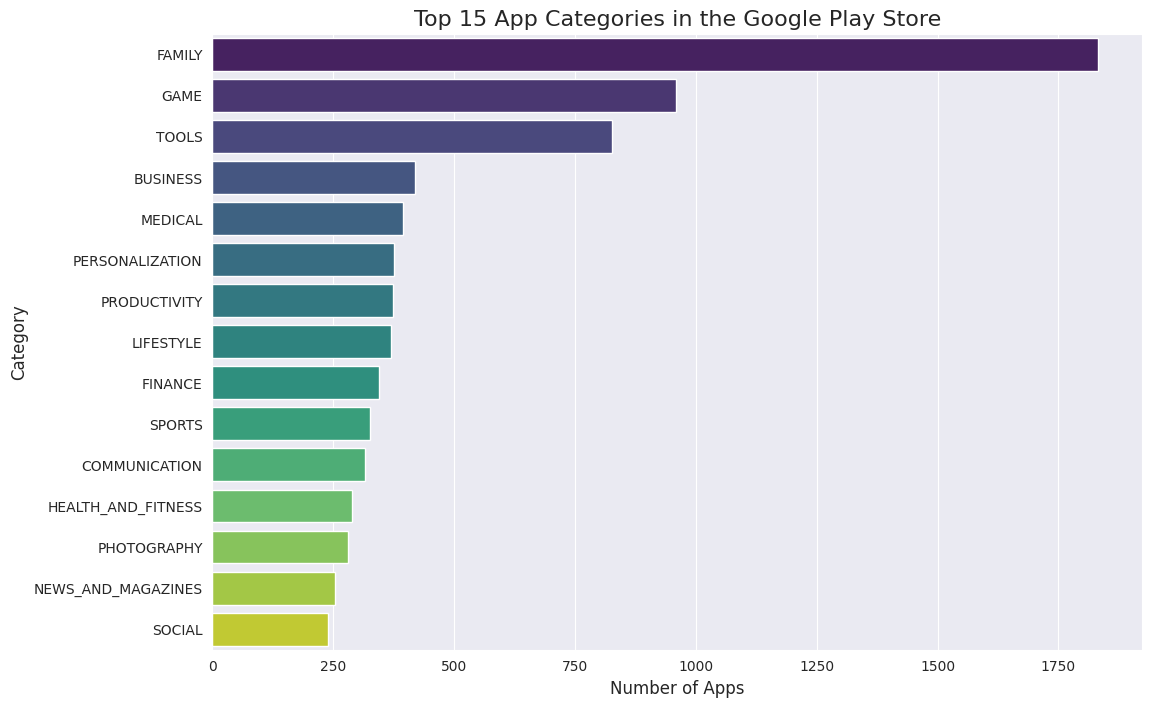

In [12]:
sns.set_style('darkgrid')

plt.figure(figsize=(12, 8))

top_categories = apps_df_cleaned['Category'].value_counts().nlargest(15).index

sns.countplot(y='Category', data=apps_df_cleaned, order=top_categories, palette='viridis')

plt.title('Top 15 App Categories in the Google Play Store', fontsize=16)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

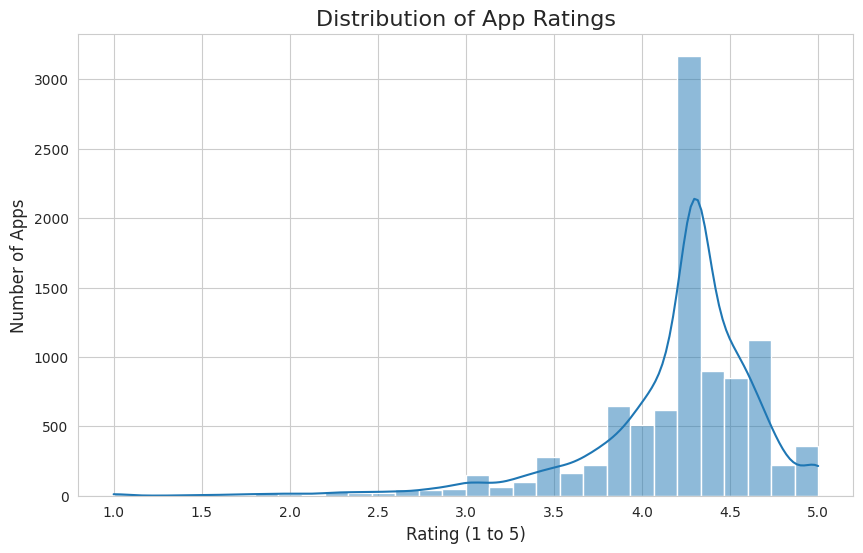

In [13]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))

sns.histplot(apps_df_cleaned['Rating'], bins=30, kde=True)

plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating (1 to 5)', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.show()

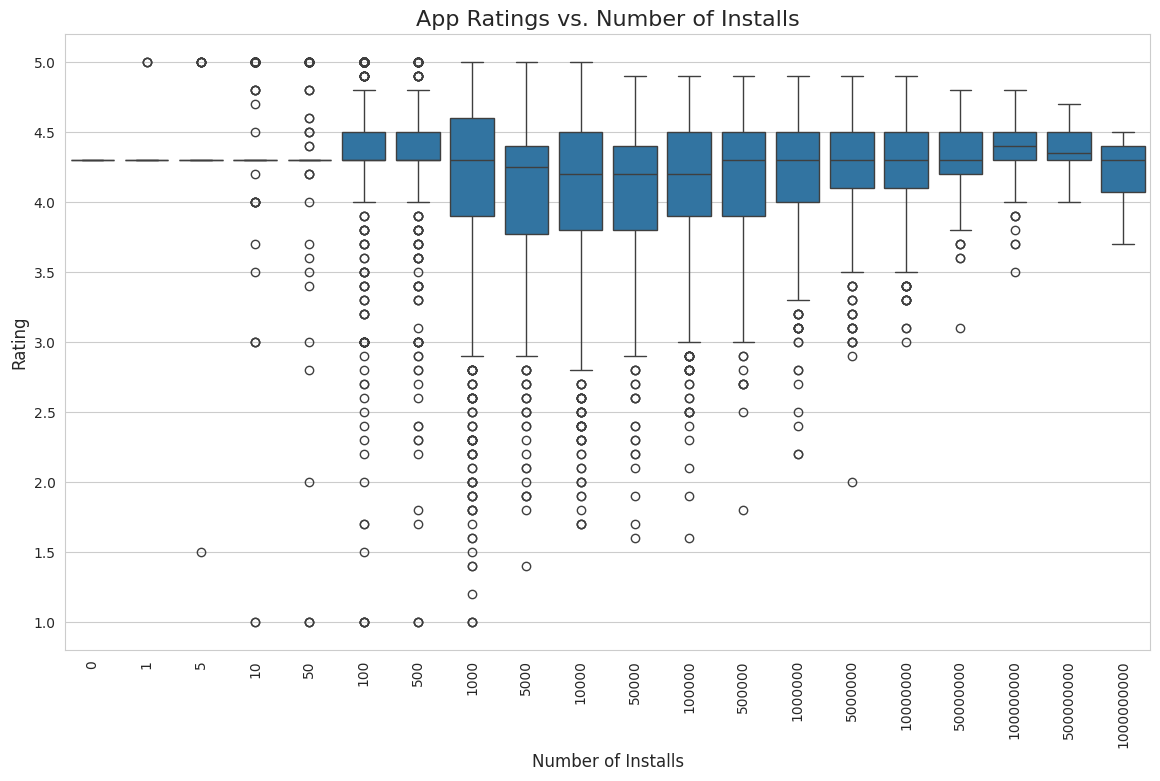

In [14]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='Installs', y='Rating', data=apps_df_cleaned)

plt.title('App Ratings vs. Number of Installs', fontsize=16)
plt.xlabel('Number of Installs', fontsize=12)
plt.ylabel('Rating', fontsize=12)

plt.xticks(rotation=90)
plt.show()

In [15]:
print("--- User Reviews Dataset Information ---")
reviews_df.info()

print("\n--- Count of Missing Values ---")
print(reviews_df.isnull().sum())

--- User Reviews Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB

--- Count of Missing Values ---
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [16]:
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

print("✅ Rows with missing reviews have been removed.")
print("\n--- Verifying Missing Values ---")
print(reviews_df.isnull().sum())

✅ Rows with missing reviews have been removed.

--- Verifying Missing Values ---
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


/tmp/ipython-input-521373379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=reviews_df, order=['Positive', 'Negative', 'Neutral'], palette='Set2')


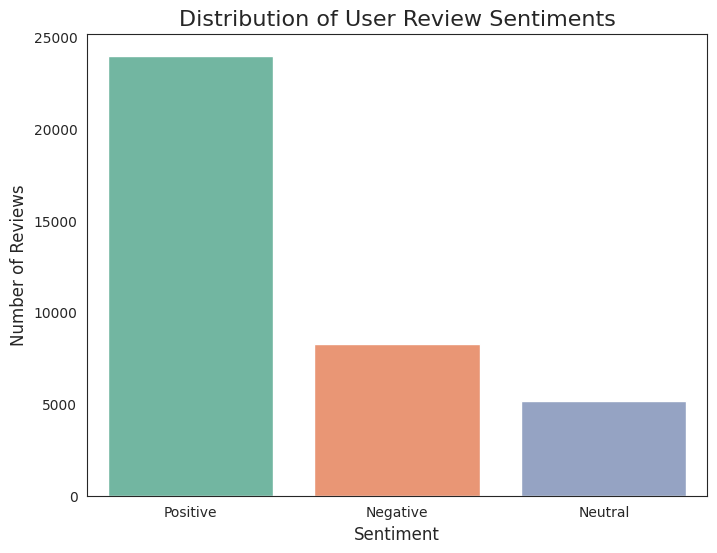

In [17]:
sns.set_style('white')

plt.figure(figsize=(8, 6))

sns.countplot(x='Sentiment', data=reviews_df, order=['Positive', 'Negative', 'Neutral'], palette='Set2')

plt.title('Distribution of User Review Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

This analysis of the Google Play Store dataset aimed to uncover key trends in the Android app market. The investigation revealed that the market is heavily dominated by the 'Family' and 'Game' categories, with a generally high distribution of user ratings across all apps. A direct sentiment analysis of user reviews reinforces this positive outlook, showing that the vast majority of feedback is 'Positive'. This suggests a mature market where, despite high competition in major categories, users generally have a favorable opinion of the apps available.